In [1]:
#Import the necessary libraries to be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json



# Data Gathering

In [2]:
#Download WeRateDogs Twitter archive data
df_arc=pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#Programmatically download the tweet image prediction data
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response= requests.get(url)

with open('image-predictions.tsv',mode='wb')as file:
    file.write(response.content)
    


In [4]:
#Load additional twitter data queried via Twitter API (tweet-json.txt)
df3=[]
with open('tweet-json.txt','r')as file:
    for line in file:
        data=json.loads(line)
        tweet_id=data['id']
        favourite_count=data['favorite_count']
        retweet_count=data['retweet_count']
        df3.append({'tweet_id':tweet_id,
                    'favorite_count':favourite_count,
                    'retweet_count':retweet_count})
data_json=pd.DataFrame(df3,columns=['tweet_id','favorite_count','retweet_count'])


# Assessing Data

### Assessing Twitter Archive Data

In [5]:
df_arc.sample(10)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
2238  668113020489474048                    NaN                  NaN   
187   856282028240666624                    NaN                  NaN   
1342  704819833553219584                    NaN                  NaN   
423   821765923262631936                    NaN                  NaN   
1952  673680198160809984                    NaN                  NaN   
2230  668237644992782336                    NaN                  NaN   
259   843235543001513987                    NaN                  NaN   
1710  680583894916304897                    NaN                  NaN   
2052  671486386088865792                    NaN                  NaN   
640   793241302385262592                    NaN                  NaN   

                      timestamp  \
2238  2015-11-21 17:05:31 +0000   
187   2017-04-23 23:01:59 +0000   
1342  2016-03-02 00:05:17 +0000   
423   2017-01-18 17:07:18 +0000   
1952  2015-12-07 01:47:30 +0000   
2230  2015-11-22 01:20:44 +0000   
259   2017-03-18 22:59:54 +0000   
1710  2015-12-26 03:00:19 +0000   
2052  2015-12-01 00:30:04 +0000   
640   2016-11-01 00:00:38 +0000   

                                                 source  \
2238  <a href="http://twitter.com/download/iphone" r...   
187   <a href="http://twitter.com/download/iphone" r...   
1342  <a href="http://twitter.com/download/iphone" r...   
423   <a href="http://twitter.com/download/iphone" r...   
1952  <a href="http://twitter.com/download/iphone" r...   
2230  <a href="http://twitter.com/download/iphone" r...   
259   <a href="http://twitter.com/download/iphone" r...   
1710  <a href="http://twitter.com/download/iphone" r...   
2052  <a href="http://twitter.com/download/iphone" r...   
640   <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
2238  This is Alfie. He's that one hypocritical gym ...                  NaN   
187   This is Cermet, Paesh, and Morple. They are ab...                  NaN   
1342  This is Chesterson. He's a Bolivian Scoop Dog....                  NaN   
423   This is Duchess. She uses dark doggo forces to...                  NaN   
1952  This is Shnuggles. I would kill for Shnuggles....                  NaN   
2230  This is Torque. He served his nickel. Better n...                  NaN   
259   This is Tycho. She just had new wheels install...                  NaN   
1710  This is Penny. Her tennis ball slowly rolled d...                  NaN   
2052  This is Malcolm. He just saw a spider. 10/10 h...                  NaN   
640   This is Tucker. He's out here bustin h*ckin gh...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
2238                       NaN                        NaN   
187                        NaN                        NaN   
1342                       NaN                        NaN   
423                        NaN                        NaN   
1952                       NaN                        NaN   
2230                       NaN                        NaN   
259                        NaN                        NaN   
1710                       NaN                        NaN   
2052                       NaN                        NaN   
640                        NaN                        NaN   

                                          expanded_urls  rating_numerator  \
2238  https://twitter.com/dog_rates/status/668113020...                 6   
187   https://twitter.com/dog_rates/status/856282028...                14   
1342  https://twitter.com/dog_rates/status/704819833...                 7   
423   https://twitter.com/dog_rates/status/821765923...                13   
1952  https://twitter.com/dog_rates/status/673680198...                13   
2230  https://twitter.com/dog_rates/status/668237644...                10   
259   https://twitter.com/dog_rates/status/843235543...                13   
1710  https://twit

In [6]:
df_arc['retweeted_status_id'].unique()

array([           nan, 8.87473957e+17, 8.86053734e+17, 8.30583321e+17,
       8.78057613e+17, 8.78281511e+17, 6.69000397e+17, 8.76850772e+17,
       8.66334965e+17, 8.68880398e+17, 8.73213776e+17, 8.72657584e+17,
       8.41077006e+17, 8.59196979e+17, 8.68552279e+17, 8.65013420e+17,
       8.66450706e+17, 8.37820168e+17, 8.63062472e+17, 8.06629075e+17,
       8.60563773e+17, 8.60914485e+17, 7.61672994e+17, 8.39549326e+17,
       8.57061112e+17, 8.44704788e+17, 8.56330159e+17, 8.42163533e+17,
       8.55122533e+17, 8.31650052e+17, 8.29374342e+17, 8.48289382e+17,
       8.33124695e+17, 8.32369877e+17, 8.47971000e+17, 7.56288534e+17,
       7.73308824e+17, 8.07106841e+17, 8.17423860e+17, 8.40632337e+17,
       6.67152164e+17, 8.39289919e+17, 8.38905981e+17, 7.83839966e+17,
       8.20749717e+17, 8.37011345e+17, 8.36648149e+17, 8.17827839e+17,
       7.86963064e+17, 8.35264099e+17, 7.53039831e+17, 8.29501995e+17,
       8.32434358e+17, 8.32766382e+17, 7.86709083e+17, 7.93286476e+17,
      

In [7]:
df_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [8]:
df_arc.duplicated().sum()

0

In [9]:
df_arc.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [10]:
df_arc.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [11]:
df_arc['rating_denominator'].unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

### Assessing Tweet Image Predictions

In [12]:
images=pd.read_csv('image-predictions.tsv',sep='\t')
images.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [13]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
images.duplicated().sum()

0

In [15]:
images.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

### Assessing Twitter API Tweet Data

In [16]:
data_json.head(10)

tweet_id  favorite_count  retweet_count
0  892420643555336193           39467           8853
1  892177421306343426           33819           6514
2  891815181378084864           25461           4328
3  891689557279858688           42908           8964
4  891327558926688256           41048           9774
5  891087950875897856           20562           3261
6  890971913173991426           12041           2158
7  890729181411237888           56848          16716
8  890609185150312448           28226           4429
9  890240255349198849           32467           7711

In [17]:
data_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [18]:
data_json.isna().sum()

tweet_id          0
favorite_count    0
retweet_count     0
dtype: int64

# Data Issues

## Tidiness Issues
1. Dog stages are seperated into 4 columns

2. All datas are related and should be in a single dataframe


## Quality Issues

Twitter Archive Data
1. There are 181 retweets

2. Meaningless column names

3. Timestamp is not in in the correct datatype(datatime)

4. Inconsistent Rating denominator value

5. tweet_id datatype should be a string instead of integer(across the 3 datasets)

Image Predictions Data

6. Inconsistent P names casing(mixture of upper&lower cases as first letter of P names)

7. Some column names are not easily understood

Twitter API Data

8. Column names to be changed


# Cleaning Data

In [19]:
#Making copies of original pieces of data
df_arc_clean=df_arc.copy()
images_clean=images.copy()
data_json_clean=data_json.copy()

In [20]:
df_arc_clean.head(3)


tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   

   rating_denominator     name doggo floofer pupper puppo  
0                  10  Phineas  None    None   None  None  
1                  10    Tilly  None    None   None  None  
2                  10   Archie  None    None   None  None

In [21]:
images_clean.head(3)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True

In [22]:
data_json_clean.head(3)

tweet_id  favorite_count  retweet_count
0  892420643555336193           39467           8853
1  892177421306343426           33819           6514
2  891815181378084864           25461           4328

# Structural Issues

### Tidiness Issue 1:
Dog stages are divided into 4 columns

### Define:
Merge the 4 columns into 1 column

### Code

In [23]:
df_arc_clean['Dog Stage']=df_arc_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')


In [24]:
#Dropping the 4 columns that represented Dog stages
df_arc_clean = df_arc_clean.drop(columns=['doggo','floofer','pupper','puppo']) 

### Test

In [25]:
df_arc_clean.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name Dog Stage  
0                  10   Phineas       NaN  
1                  10     Tilly       NaN  
2                  10    Archie       NaN  
3                  10     Darla       NaN  
4                  10  Franklin       NaN

### Tidiness Issue 2:
All dataframes are related and should be in a single dataframe

### Define:
Merge the 3 datframes to get a single dataframe

### Code

In [26]:
# Merging twitter archive dataframe with Twitter API dataframe
df_clean=pd.merge(df_arc_clean,images_clean,on =['tweet_id'],how='left')
# Merging the newly merged dataframe with the Tweet image predictions dataframe
df_clean=pd.merge(df_clean,data_json_clean,on =['tweet_id'],how='left')

### Test

In [27]:
df_clean.head(2)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   

                                       expanded_urls  ...   p1_conf  p1_dog  \
0  https://twitter.com/dog_rates/status/892420643...  ...  0.097049   False   
1  https://twitter.com/dog_rates/status/892177421...  ...  0.323581    True   

         p2   p2_conf p2_dog        p3   p3_conf  p3_dog favorite_count  \
0     bagel  0.085851  False    banana  0.076110   False        39467.0   
1  Pekinese  0.090647   True  papillon  0.068957    True        33819.0   

  retweet_count  
0        8853.0  
1        6514.0  

[2 rows x 27 columns]

In [28]:
list(df_clean.columns)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'Dog Stage',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'favorite_count',
 'retweet_count']

### Quality 1
There are 181 retweets

### Define
Drop rows that represents retweets

### Code

In [29]:
retweeted=df_clean[df_clean.retweeted_status_id.notnull()].index.tolist()

df_clean.drop(retweeted,inplace=True)

### Test

In [30]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  Dog Stage                   364 n

### Quality Issues 2:

Meaningless column names

### Define

Drop columns not necessary in the dataframe

### Code

In [31]:
df_clean=df_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1)

### Test

In [32]:
df_clean.head()

tweet_id                  timestamp  \
0  892420643555336193  2017-08-01 16:23:56 +0000   
1  892177421306343426  2017-08-01 00:17:27 +0000   
2  891815181378084864  2017-07-31 00:18:03 +0000   
3  891689557279858688  2017-07-30 15:58:51 +0000   
4  891327558926688256  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name Dog Stage  \
0                  10   Phineas       NaN   
1                  10     Tilly       NaN   
2                  10    Archie       NaN   
3                  10     Darla       NaN   
4                  10  Franklin       NaN   

                                           jpg_url  ...   p1_conf p1_dog  \
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg  ...  0.097049  False   
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg  ...  0.323581   True   
2  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg  ...  0.716012   True   
3  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg  ...  0.170278  False   
4  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg  ...  0.555712   True   

                   p2   p2_conf p2_dog                           p3   p3_conf  \
0               bagel  0.085851  False                       banana  0.076110   
1            Pekinese  0.090647   True                     papillon  0.068957   
2            malamute  0.078253   True                       kelpie  0.031379   
3  Labrador_retriever  0.168086   True                      spatula  0.040836   
4    English_springer  0.225770   True  German_short-haired_pointer  0.175219   

  p3_dog  favorite_count retweet_count  
0  False         39467.0        8853.0  
1   True         33819.0        6514.0  
2   True         25461.0        4328.0  
3  False         42908.0        8964.0  
4   True         41048.0        9774.0  

[5 rows x 22 columns]

### Quality Issues 3:

Timestamp is not in in the correct datatype(datetime)

### Define
Change timestamp datatype from string to datetime datatype

### Code

In [33]:
df_clean['timestamp']=pd.to_datetime(df_clean['timestamp'])

### Test

In [34]:
df_clean['timestamp'].dtypes

datetime64[ns, UTC]

### Quality Issue 4:
Inconsistent Rating denominator value

### Define
The yardstick for rating is 10,although some ratings(numerator)are more than 10, all denominators should maintain a uniform value of 10

### Code
    

In [35]:
df_clean.rating_denominator=df_clean.rating_denominator.map(lambda rating_denominator:10 if rating_denominator==10 else 10)

### Test

In [36]:
df_clean.rating_denominator.unique()

array([10], dtype=int64)

### Quality Issue 5:
tweet_id datatype should be a string instead of integer

### Define
Convert tweet_id datatype from integer to string so as not to interfere with analysis .

### Code

In [37]:
df_clean.tweet_id=df_clean.tweet_id.astype(str)

In [38]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   int64              
 6   rating_denominator  2175 non-null   int64              
 7   name                2175 non-null   object             
 8   Dog Stage           364 non-null    object             
 9   jpg_url             1994 non-null   object             
 10  img_num             1994 non-null   float64            
 11  p1                  1994 non-null   object             
 12  p1_conf             1994 non-null 

### Quality Issue 6:
Inconsistent P names casing(mixture of upper&lower cases as first letter of P names)

### Define
To follow the standard naming format, the first letter of all predicted dog breed will be made uppercase

### Code


In [39]:
df_clean.p1=df_clean.p2.str.capitalize()
df_clean.p2=df_clean.p2.str.capitalize()
df_clean.p3=df_clean.p3.str.capitalize()

### Test

In [40]:
df_clean.p3.unique()

array(['Banana', 'Papillon', 'Kelpie', 'Spatula',
       'German_short-haired_pointer', 'Indian_elephant', 'Ice_lolly',
       'Pembroke', 'Chesapeake_bay_retriever', 'Chihuahua', 'Chow',
       'Muzzle', 'Basenji', 'Staffordshire_bullterrier', 'Redbone',
       'Saluki', 'Labrador_retriever', 'English_setter', 'Malamute',
       'Bull_mastiff', 'Weimaraner', 'Shopping_cart', 'Beagle',
       'Can_opener', 'Dandie_dinmont', 'Car_wheel', 'Boston_bull', nan,
       'Siamese_cat', 'Bernese_mountain_dog', 'Kuvasz', 'Eskimo_dog',
       'Norfolk_terrier', 'Brabancon_griffon', 'Norwegian_elkhound',
       'Newfoundland', 'Dingo', 'Flat-coated_retriever', 'Cardigan',
       'Cocker_spaniel', 'Golden_retriever', 'Koala', 'Persian_cat',
       'Ibex', 'Traffic_light', 'Clumber', 'Bath_towel', 'Egyptian_cat',
       'American_staffordshire_terrier', 'Ibizan_hound', 'Appenzeller',
       'Toy_terrier', 'Bathtub', 'Tibetan_mastiff',
       'Greater_swiss_mountain_dog', 'Vizsla', 'Great_pyrenees',


### Quality Issue 7:
Some column names are not easily understood

### Define
Column names (p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog)are not definitive and will be renamed

### Code

In [41]:
df_clean.rename(columns={'p1':'Predicted_Breed1','p1_conf':'P_Breed1_confidence','p1_dog':'P_Breed1_accuracy',
                           'p2':'Predicted_Breed2','p2_conf':'P_Breed2_confidence','p2_dog':'P_Breed2_accuracy',
                           'p3':'Predicted_Breed3','p3_conf':'P_Breed3_confidence','p3_dog':'P_Breed1_accuracy'},inplace=True)

In [42]:
df_clean.head()

tweet_id                 timestamp  \
0  892420643555336193 2017-08-01 16:23:56+00:00   
1  892177421306343426 2017-08-01 00:17:27+00:00   
2  891815181378084864 2017-07-31 00:18:03+00:00   
3  891689557279858688 2017-07-30 15:58:51+00:00   
4  891327558926688256 2017-07-29 16:00:24+00:00   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name Dog Stage  \
0                  10   Phineas       NaN   
1                  10     Tilly       NaN   
2                  10    Archie       NaN   
3                  10     Darla       NaN   
4                  10  Franklin       NaN   

                                           jpg_url  ...  P_Breed1_confidence  \
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg  ...             0.097049   
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg  ...             0.323581   
2  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg  ...             0.716012   
3  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg  ...             0.170278   
4  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg  ...             0.555712   

  P_Breed1_accuracy    Predicted_Breed2 P_Breed2_confidence P_Breed2_accuracy  \
0             False               Bagel            0.085851             False   
1              True            Pekinese            0.090647              True   
2              True            Malamute            0.078253              True   
3             False  Labrador_retriever            0.168086              True   
4              True    English_springer            0.225770              True   

              Predicted_Breed3 P_Breed3_confidence P_Breed1_accuracy  \
0                       Banana            0.076110             False   
1                     Papillon            0.068957              True   
2                       Kelpie            0.031379              True   
3                      Spatula            0.040836             False   
4  German_short-haired_pointer            0.175219              True   

   favorite_count retweet_count  
0         39467.0        8853.0  
1         33819.0        6514.0  
2         25461.0        4328.0  
3         42908.0        8964.0  
4         41048.0        9774.0  

[5 rows x 22 columns]

### Quality Issue 8:
Column names to be changed.

### Define
columns(Favorite_counts and retweet_counts) are to be changed to normally used twitter lingo

### Code


In [50]:
df_clean.rename(columns={'Favorite_count':'Likes','retweet_count':'Retweets'},inplace=True)

### Test

In [51]:

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   Tweet_id             2175 non-null   object             
 1   Timestamp            2175 non-null   datetime64[ns, UTC]
 2   Source               2175 non-null   object             
 3   Text                 2175 non-null   object             
 4   Expanded_urls        2117 non-null   object             
 5   Rating_numerator     2175 non-null   int64              
 6   Rating_denominator   2175 non-null   int64              
 7   Name                 2175 non-null   object             
 8   Dog stage            364 non-null    object             
 9   Jpg_url              1994 non-null   object             
 10  Img_num              1994 non-null   float64            
 11  Predicted_breed1     1994 non-null   object             
 12  P_breed1_confidence 

In [52]:
#Convert all first letter of column names to uppercase to achieve uniformity
df_clean.columns=map(str.capitalize,df_clean.columns)

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   Tweet_id             2175 non-null   object             
 1   Timestamp            2175 non-null   datetime64[ns, UTC]
 2   Source               2175 non-null   object             
 3   Text                 2175 non-null   object             
 4   Expanded_urls        2117 non-null   object             
 5   Rating_numerator     2175 non-null   int64              
 6   Rating_denominator   2175 non-null   int64              
 7   Name                 2175 non-null   object             
 8   Dog stage            364 non-null    object             
 9   Jpg_url              1994 non-null   object             
 10  Img_num              1994 non-null   float64            
 11  Predicted_breed1     1994 non-null   object             
 12  P_breed1_confidence 

## Storing Data

In [53]:
df_clean.to_csv('twitter_archive_master.csv',index=False)

## Analyzing and Visualizing Data

### I. Percentage of the 4 different Dog Stages

In [59]:
dog_stages=df_clean['Dog stage'].value_counts()
dog_stages

pupper     244
doggo       84
puppo       32
floofer      4
Name: Dog stage, dtype: int64

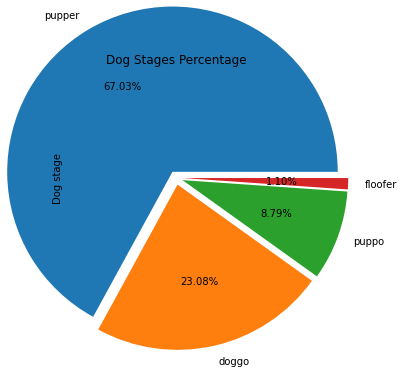

In [70]:
#Plotting a pie chart
dog_stages.plot(kind='pie',autopct='%1.2f%%', radius=1.9,explode=[0.08, 0.08, 0.08,0.08])
plt.title('Dog Stages Percentage')
plt.show()

### Insights
-Pupper has the highest percentage, that is,67.03% of dogs in this data are at the pupper dog stage. 

-Floofer has the lowest percentage.

### II. Relationship between dog stages and likes 

In [71]:
Dog_likes= df_clean[['Dog stage','Likes']].groupby('Dog stage').mean()


Dog_likes

Likes
Dog stage              
doggo      15434.523810
floofer    18576.750000
pupper      7030.229508
puppo      20950.250000

Text(0, 0.5, 'Likes')

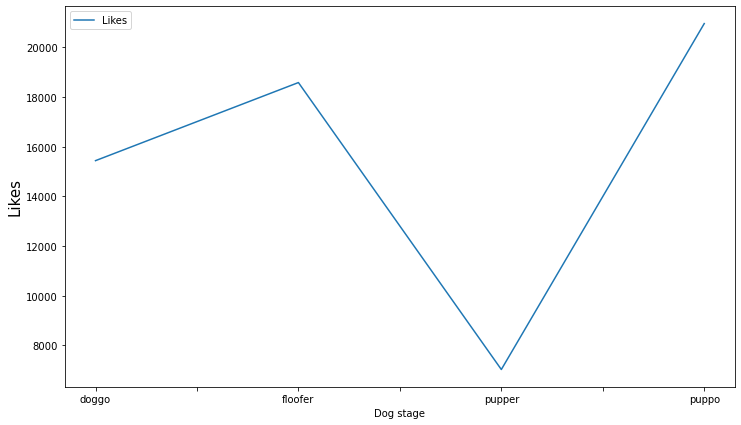

In [80]:
fig, ax= plt.subplots(figsize=(12,7))
Dog_likes.plot(ax=ax)
plt.ylabel('Likes',fontsize=15)


### Insight

- Using the average number of likes for all tweets of each dog stage, on average, tweets about dogs at the Puppo stage have the most likes,with Pupper stage having the least likes on average

### III. Relationship Between Likes and Retweets

In [88]:
corr=df_clean['Likes'].corr(df_clean['Retweets'])
print(corr) 

0.9117316533564102


Text(0, 0.5, 'Retweets')

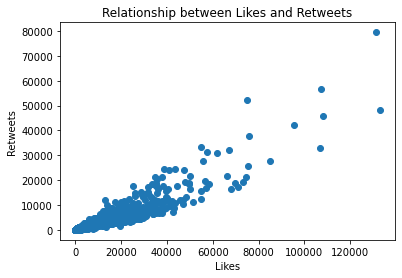

In [86]:
plt.scatter(df_clean.Likes,df_clean.Retweets)
plt.title('Relationship between Likes and Retweets')
plt.xlabel('Likes')
plt.ylabel('Retweets')

### Insight
- There is a significant and positive relationship between tweets' likes and its retweets